In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%cd F:/Breast Cancer Prediction

F:\Breast Cancer Prediction


In [4]:
df=pd.read_csv('dataR2.csv')

In [5]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [6]:
X=df.drop('Classification', axis=1)
y=df['Classification']

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [9]:
scaler=StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
k_values = [i for i in range (1,16)]
scores = []

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X1, y, cv=5)
    scores.append(np.mean(score))

In [12]:
import seaborn as sns

Text(0, 0.5, 'Accuracy Score')

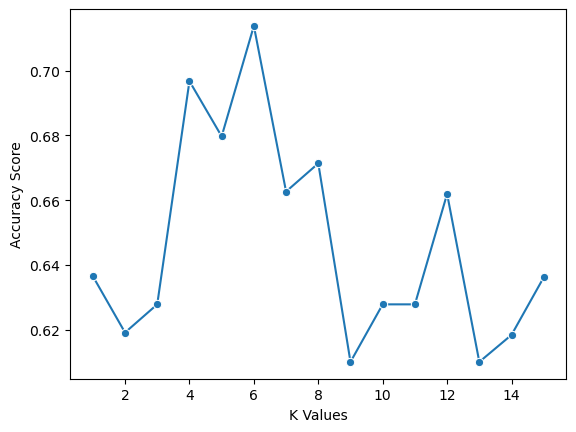

In [13]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
y_pred=knn.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy=accuracy_score(y_test,y_pred)

In [18]:
accuracy

0.8333333333333334

In [19]:
from sklearn.svm import SVC

In [20]:
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [21]:
y_pred=classifier.predict(X_test)

In [22]:
svm_accuracy= accuracy_score(y_test,y_pred)

In [23]:
svm_accuracy

0.8333333333333334

In [24]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [39]:
from sklearn import tree

In [40]:
model=tree.DecisionTreeClassifier()

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
model.score(X,y)

0.4482758620689655

In [43]:
y_pred3=model.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.8333333333333334

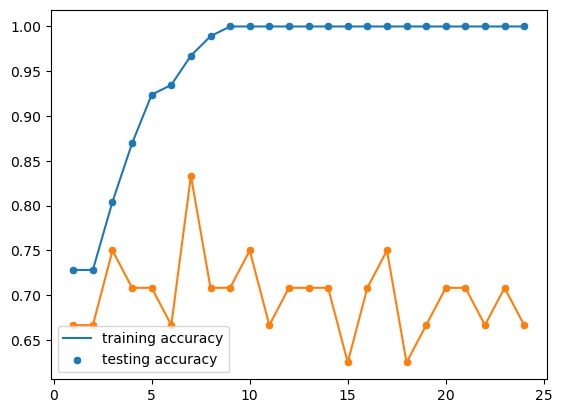

In [51]:
depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    model = tree.DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    model.fit(X_train, y_train)
    
    y_predict_train = model.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
        
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [52]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)

This is the best depth for Decision Tree Classifier:  7 
Accuracy score is:  0.8333333333333334
